**Thêm thư viện**

In [21]:
import pandas as pd
import statistics as sta
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

**Tên file csv**

In [22]:
csv = "LazData.csv"
data = pd.read_csv(csv)

# **Xử lý dữ liệu**

**Hàm tạo bảng thống kê và vẽ Barplot**

Dành cho những cột dữ liệu thông thường và không cần chỉnh sửa gì thêm

In [23]:
def stat_table(a,title_plt=""):
    x = data.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['quantity']
    count = []
    for i in dt['quantity']:
        x = i
        count.append(round(x))
    dt['quantity'] = count
    print(dt)
    mylabels = dt.index
    plt.figure(figsize = (10, 4))
    # Barplot
    plt.title(title_plt, fontsize = 20, color = 'red')
    sns.barplot(count, mylabels, data = dt, orient = 'h')

**Hàm vẽ khoảng giá tiền sản phẩm**

Lấy lại từ stat_table và được điều chỉnh lại

In [24]:
# Lọc và phân chia các khoảng giá tiền của sản phẩm
price_cate = data["p_price"]
# Phân loại và thống kê giá trị của các sản phẩm
list_cate = ["Sản phẩm có giá từ 0 - dưới 10k","Sản phẩm có giá từ 10k - dưới 100k","Sản phẩm có giá từ 100k - dưới 1tr","Sản phẩm có giá từ 1tr - 10tr","Sản phẩm có giá từ trên 10tr"]
count_list_cate = [0, 0, 0, 0, 0]
count_price_cate = []
for item in price_cate:
    if item<10000:
        count_list_cate[0] = count_list_cate[0] +1
    elif item<100000:
        count_list_cate[1] = count_list_cate[1] +1
    elif item<1000000:
        count_list_cate[2] = count_list_cate[2] +1
    elif item<10000000:
        count_list_cate[3] = count_list_cate[3] +1
    else:
        count_list_cate[4] = count_list_cate[4] +1
# Tính phần trăm
for item in count_list_cate:
    count_price_cate.append(round(item))
    
def barplot_khoang_gia_tien_san_pham(count, list_cate):
    price_df = pd.Series(count, index=list_cate) # Tạo dataframe với 2 cột là tên danh mục và phần trăm các khoảng tiền
    print(price_df)
    mylabels = price_df.index
    plt.figure(figsize = (10, 4))
    plt.title('Các khoảng giá tiền của các sản phẩm', fontsize = 20, color = 'red')
    sns.barplot(price_df, mylabels, orient = 'h')

**Hàm vẽ biểu đồ thống kê các thương hiệu sản phẩm**

Lấy lại từ stat_table và được điều chỉnh lại

In [25]:
def barplot_cac_thuong_hieu_san_pham(column,title=""):
    data_check = data[column]       # Lấy cột dữ liệu từ dataframe
    brand_list_check = []           # Danh sách chứa tên các thương hiệu chưa qua xử lý
    quantity_list_check = []        # Danh sách chứa số lượng của mỗi thương hiệu chưa qua xử lý

    for item in data_check:                                                 #####
        if item not in brand_list_check:                                        #
            brand_list_check.append(item)                                       #   
            quantity_list_check.append(1)                                       #
        else:                                                                   #
            index = brand_list_check.index(item)                                #
            quantity_list_check[index] = quantity_list_check[index]+1       #####

    quantity = []       # Danh sách chứa tên các thương hiệu đã qua xử lý
    brand = []          # Danh sách chứa số lượng của mỗi thương hiệu đã qua xử lý

    for item in range(len(quantity_list_check)):                                                                
        count = quantity_list_check[item]
        name_brand = brand_list_check[item]
        if count<15:                                    # Thương hiệu có ít hơn 15 sản phẩm     #####   Lọc và xử lý
            name_brand = "Các thương hiệu nhỏ"          #  được xem là thương hiệu nhỏ              #    các thương hiệu
        if name_brand == "No Brand":            # Các sản phẩm không có thương hiệu                 #   Tránh bị quá nhiều
            name_brand = "Không có thương hiệu"                                                 #####    thương hiệu lúc vẽ barplot

        if name_brand not in brand:                         #####
            brand.append(name_brand)                            #   
            quantity.append(count)                              #   Đếm số lượng sản phẩm
        else:                                                   #   của tất cả các thương hiệu
            index = brand.index(name_brand)                     #
            quantity[index] = quantity[index] + count       #####
    print(f'Có tổng số {len(brand)} thương hiệu')
    brand_df = pd.Series(quantity, index=brand) # Tạo dataframe với 2 cột là tên thương hiệu và số lượng sản phẩm
    brand_df = brand_df.sort_values()       # Sắp xếp lại dataframe theo thứ tự tăng dần dựa vào số lượng sản phẩm
    print(brand_df)
    mylabels = brand_df.index
    plt.figure(figsize = (10, 4))
    plt.title(title, fontsize = 20, color = 'red')
    sns.barplot(brand_df, mylabels, orient = 'h')

# **Kết quả thống kê**

**Tổng quan về file csv**

In [26]:
print(f"Dữ liệu thu thập được từ Lazada có {len(price_cate)} sản phẩm")
print(f"Mỗi sản phẩm có {len(data.columns)} cột chứa dữ liệu")
data.head(2)

Dữ liệu thu thập được từ Lazada có 1841 sản phẩm
Mỗi sản phẩm có 17 cột chứa dữ liệu


,p_brand,p_cate,p_image,p_mall,p_name,p_number_reviews,p_price,p_rate1star,p_rate2star,p_rate3star,p_rate4star,p_rate5star,p_rating,s_name,s_rating,s_response_rate,s_ship_ontime
0,Dell,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/ab973a529b50491bb63a...,Mall,Laptop Dell Inspiron 7400 14.5 inches IPS QHD ...,0,31490000,0,0,0,0,0,0.0%,DELL Official Retail Store,88%,100%,100%
1,HP,Máy vi tính & Laptop,//vn-live-05.slatic.net/p/0fc9119358dc21cb9dcd...,Mall,Laptop HP ProBook 450 G8 2H0Y1PA,0,31490000,0,0,0,0,0,0.0%,An Phát HP,94%,89%,100%


                              quantity
p_cate                                
Electronics Accessories            128
Giày dép & Quần áo nữ              106
Màn hình & Máy in                  219
Máy vi tính & Laptop               239
Máy ảnh & Máy bay camera           551
TV & Video                          36
Thiết bị thông minh                303
Túi xách và Vali túi du lịch        64
Âm thanh                           149
Điện thoại & Máy tính bảng          46


C:\Users\lybuu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


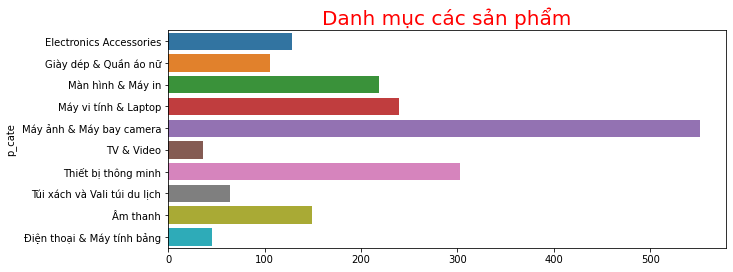

In [27]:
stat_table("p_cate", "Danh mục các sản phẩm")

Sản phẩm có giá từ 0 - dưới 10k       102
Sản phẩm có giá từ 10k - dưới 100k    548
Sản phẩm có giá từ 100k - dưới 1tr    754
Sản phẩm có giá từ 1tr - 10tr         349
Sản phẩm có giá từ trên 10tr           88
dtype: int64


C:\Users\lybuu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


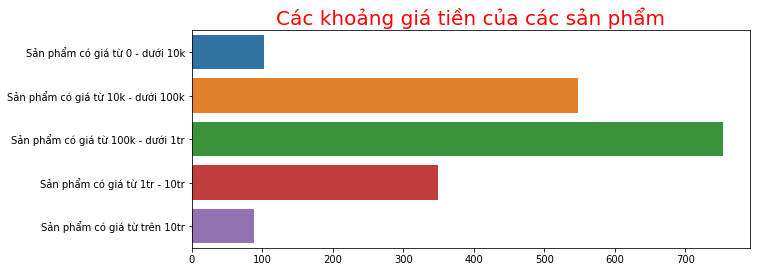

In [28]:
barplot_khoang_gia_tien_san_pham(count_price_cate, list_cate)

          quantity
p_mall            
Mall           210
Non-Mall      1631


C:\Users\lybuu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


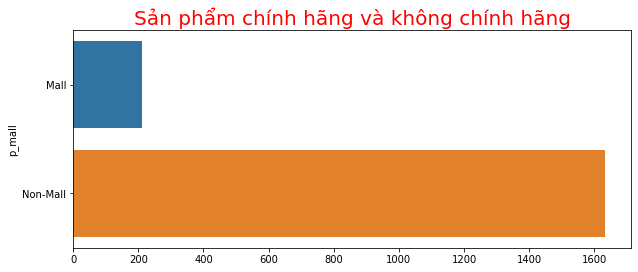

In [29]:
stat_table("p_mall","Sản phẩm chính hãng và không chính hãng")

Có tổng số 13 thương hiệu
TP-Link                  15
amazfit                  15
Apple                    26
IMOU                     29
Samsung                  30
Xiaomi                   32
HP                       37
yoosee                   37
Dell                     55
Ezviz                    58
Các thương hiệu nhỏ     339
OEM                     342
Không có thương hiệu    826
dtype: int64


C:\Users\lybuu\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


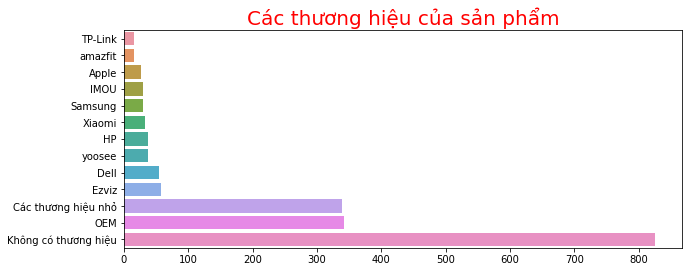

In [30]:
barplot_cac_thuong_hieu_san_pham('p_brand',"Các thương hiệu của sản phẩm")